<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_4_1_knapsack_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion del problema de la mochila

###Configuraciones y definiciones

In [ ]:
pip install deap

In [ ]:
import knapsack

In [ ]:
## Paso 1: Modulos

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random as rd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
## Paso 2: Parametros del problema

# Contenido del problema de la mochila
ks = knapsack.Knapsack01Problem() # Elementos y pesos     # Tamaño del problema (longitud de las cadenas binarias)

POPULATION_SIZE = 50      # Tamaño de los inidivios de la población
P_CROSSOVER     =  0.9    # Probabilidad de cruza
P_MUTATION      =  0.1    # Probabilidad de mutación

MAX_GENERATIONS = 50      # Maximo numero de generaciones (condición de termino)

In [ ]:
HALL_OF_FAME_SIZE = 5

In [ ]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados

In [ ]:
## Paso 4: Declarando el cromosoma

toolbox = base.Toolbox()
toolbox.register('ZeroOrOne', rd.randint , 0 , 1)

In [ ]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create('FitnessMax', base.Fitness, weights = (1.0,))

In [ ]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create('Individual', list, fitness = creator.FitnessMax)

In [ ]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register('IndividualCreator', tools.initRepeat, creator.Individual, toolbox.ZeroOrOne, len(ks))

In [ ]:
## Paso 8: Declarar el operador para generar la poblacion

toolbox.register('PopulationCreator', tools.initRepeat, list, toolbox.IndividualCreator)

In [ ]:
## Paso 9: Herramienta para calcular la aptitud
##         incluida en la libreria knacksack
def knapsackValue(individual):
    return ks.getValue(individual),  # return a tuple

In [ ]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register("evaluate", knapsackValue)

In [ ]:
## Paso 11: Declarar los operadores geneticos

toolbox.register('select', tools.selTournament, tournsize = 3)
toolbox.register('mate',   tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 1.0/len(ks))

###Evolucionando la solución

In [ ]:
def problema_mochila():

    # Poblacion inicial
    population = toolbox.PopulationCreator(n=POPULATION_SIZE)

    # Objeto Statistics
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # Declarar el salon de la fama
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # Algortimo genetico, ahora con el salon de la fama
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)

    # Informacion del salon de la fama
    # Mejores individuos y el mejor de estos
    print("Hall of Fame Individuals = ", *hof.items, sep="\n")
    print("Best Ever Individual = ", hof.items[0])

    # La mejor solucion del salon de la fama
    best = hof.items[0]
    print("-- Mejor individuo = ", best)
    print("-- Mejor aptitud = ", best.fitness.values[0])

    # Mejorres elementos para la mochila
    print("-- Elementos de la mochila = ")
    ks.printItems(best)

    # Los valores estadisticos y la poblacion final estan el libro de registros
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # Resumen grafico de la evolución de los resultados
    # Color rojo : Evolucion de la maxima aptitud de la poblacion
    # Color verde: Evolucion del promedio de la aptitud de la poblacion
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.show()
    return

Hall of Fame Individuals = 
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]
Best Ever Individual =  [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1]
-- Mejor individuo =  [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1]
-- Mejor aptitud =  1000.0
-- Elementos de la mochila = 
- Adding map: weight = 9, value = 150, accumulated weight = 9, accumulated value = 150
- Adding compass: weight = 13, value = 35, accumulated weight = 22, accumulated value = 185
- Adding water: weight = 153, value = 200, accumulated weight = 175, accumulated value = 385
- Adding sandwich: weight = 50, value = 160, accumulated weight = 225, accumulated value = 545
- Adding glucose: weight = 15, va

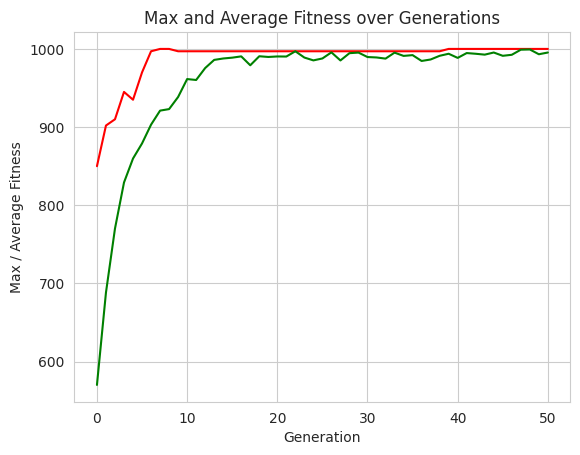

In [ ]:
problema_mochila()